<a href="https://colab.research.google.com/github/Rashida-KA/My_python_prgms/blob/main/sarima_Route_Level_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime


In [2]:
df=pd.read_excel("/content/Route Level Data.xlsx")

In [3]:
df

,rot_Code,rot_Name,CreatedOn,inv_GrandTotal
0,COOP34,COOP-34 Farwaniya -2,2023-04-04,61.360
1,COOP34,COOP-34 Farwaniya -2,2023-04-05,49.690
2,COOP34,COOP-34 Farwaniya -2,2023-04-05,55.560
3,COOP34,COOP-34 Farwaniya -2,2023-04-05,134.335
4,COOP34,COOP-34 Farwaniya -2,2023-04-05,157.500
...,...,...,...,...
17566,COOP03,COOP ROUTE -03 rawda,2023-07-31,4.980
17567,COOP03,COOP ROUTE -03 rawda,2023-07-31,1.320
17568,COOP03,COOP ROUTE -03 rawda,2023-07-31,2.620
17569,COOP03,COOP ROUTE -03 rawda,2023-07-31,24.480


In [4]:
df.columns

Index(['rot_Code', 'rot_Name', 'CreatedOn', 'inv_GrandTotal'], dtype='object')

In [5]:
df['rot_Code'].value_counts()

GRF-15    1407
KA-02      928
COOP17     906
COOP38     891
COOP14     703
COOP12     663
COOP05     651
GRF-06     647
COOP06     631
COOP25     580
COOP22     574
COOP16     568
KA-04      539
COOP11     538
COOP07     522
COOP19     515
COOP26     489
KA-05      477
COOP29     439
COOP27     416
COOP18     398
GRF-08     314
COOP34     299
KA-12      282
COOP10     264
COOP20     255
COOP13     242
COOP15     232
COOP31     224
COOP21     223
COOP32     208
COOP23     162
COOP01     151
KA-11      144
COOP36     118
COOP35     103
COOP24      98
COOP03      93
COOP37      85
KA-06       84
KA-09       74
COOP30      74
KA-10       73
COOP08      63
COOP28      49
COOP33      46
COOP02      44
KA-01       43
COOP04      26
KA-03       12
OLS-01       2
COOP09       2
Name: rot_Code, dtype: int64

In [6]:
df['rot_Name'].value_counts()

GROCERY ROUTE -F -15 JLEEB 1       1407
KA -02 - Salmiya                    928
COOP ROUTE -17  Andalus             906
COOP-38                             891
COOP ROUTE -14 Sulibikhat           703
COOP ROUTE -12 Ardiya               663
COOP ROUTE -05 musharaf             651
GROCERY ROUTE -F -06 KHAITAN 2      647
COOP ROUTE -06 rumaythia            631
COOP-25 Sabah Al-Ahmad              580
COOP-22 Sabahiya                    574
COOP ROUTE -16 jahraa-3             568
KA -04 - Shuwaikh                   539
COOP ROUTE -11 furwania             538
COOP ROUTE -07 Hawali 01            522
COOP-19 sabah alsaalim              515
COOP-26 Fahahel                     489
KA -05 - Fahahel                    477
COOP-29 Asimah                      439
COOP-27 Um AlHiman                  416
COOP ROUTE -18 saad alabd allah     398
GROCERY ROUTE -F -08 KHAITAN        314
COOP-34 Farwaniya -2                299
KA -12 - Wafra                      282
COOP ROUTE -10 alzahra'             264


In [7]:
df['CreatedOn'].value_counts()

2023-07-29    462
2023-07-30    460
2023-07-31    449
2023-07-24    436
2023-07-27    430
             ... 
2023-04-17      1
2023-04-19      1
2023-04-20      1
2023-04-27      1
2023-04-04      1
Name: CreatedOn, Length: 112, dtype: int64

In [8]:

rot_name_counts = df['rot_Name'].value_counts()

top_rot_names = rot_name_counts.head(5).index.tolist()

top_rot_df = df[df['rot_Name'].isin(top_rot_names)]



In [9]:
top_rot_df

,rot_Code,rot_Name,CreatedOn,inv_GrandTotal
57,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-05-03,12.68
58,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-05-03,23.09
59,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-05-03,17.35
60,KA-02,KA -02 - Salmiya,2023-05-03,101.99
61,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-05-03,11.52
...,...,...,...,...
17547,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-07-31,277.53
17548,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-07-31,293.83
17549,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-07-31,221.10
17550,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,2023-07-31,173.05


In [10]:
top_rot_df.isna().sum()

rot_Code          0
rot_Name          0
CreatedOn         0
inv_GrandTotal    0
dtype: int64

In [11]:
top_rot_df['CreatedOn'] = pd.to_datetime(top_rot_df['CreatedOn'])


<ipython-input-11-2f0a2ef8dd83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rot_df['CreatedOn'] = pd.to_datetime(top_rot_df['CreatedOn'])


In [12]:
top_rot_df.set_index('CreatedOn', inplace=True)


In [13]:
top_rot_df

,rot_Code,rot_Name,inv_GrandTotal
CreatedOn,,,
2023-05-03,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,12.68
2023-05-03,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,23.09
2023-05-03,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,17.35
2023-05-03,KA-02,KA -02 - Salmiya,101.99
2023-05-03,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,11.52
...,...,...,...
2023-07-31,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,277.53
2023-07-31,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,293.83
2023-07-31,GRF-15,GROCERY ROUTE -F -15 JLEEB 1,221.10


In [14]:
daily_df =top_rot_df.resample('D').sum()

<ipython-input-14-a4a012320d7f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df =top_rot_df.resample('D').sum()


In [15]:
daily_df

,inv_GrandTotal
CreatedOn,
2023-05-03,1471.040
2023-05-04,904.410
2023-05-05,1280.995
2023-05-06,1240.885
2023-05-07,1247.170
...,...
2023-07-27,3712.700
2023-07-28,3601.000
2023-07-29,4103.650


In [16]:
daily_df.tail(10)

,inv_GrandTotal
CreatedOn,
2023-07-22,3086.195
2023-07-23,2349.600
2023-07-24,3480.800
2023-07-25,4080.110
2023-07-26,3635.130
2023-07-27,3712.700
2023-07-28,3601.000
2023-07-29,4103.650
2023-07-30,3148.565


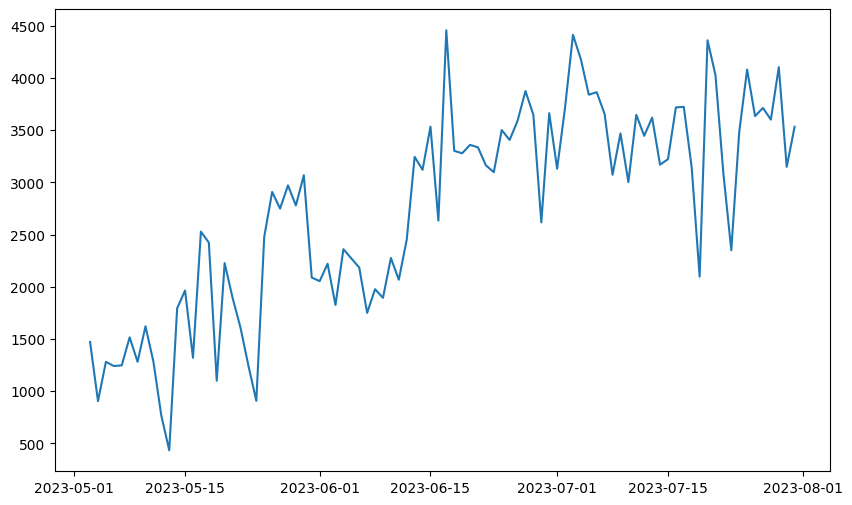

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(daily_df['inv_GrandTotal'])

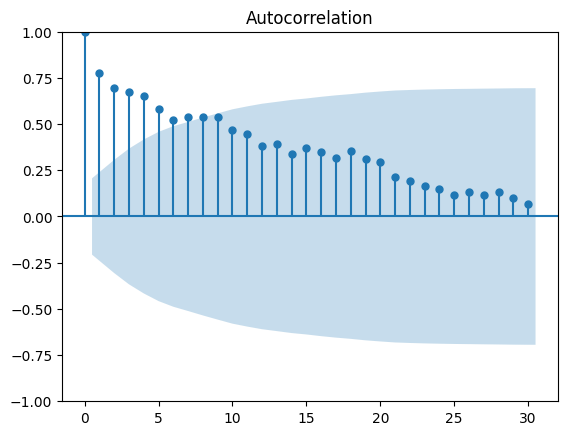

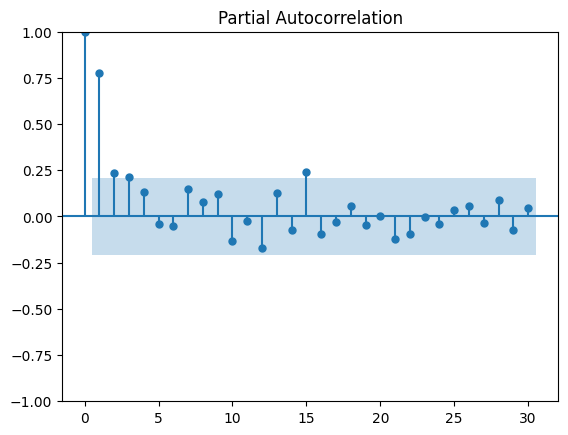

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(daily_df['inv_GrandTotal'], lags=30)
plot_pacf(daily_df['inv_GrandTotal'], lags=30)
plt.show()


In [19]:
seasonal_diff = daily_df['inv_GrandTotal'].diff(7).dropna()  # Seasonal difference
seasonal_diff

CreatedOn
2023-05-10     150.270
2023-05-11     378.865
2023-05-12    -515.410
2023-05-13    -806.985
2023-05-14     546.690
                ...   
2023-07-27    -648.220
2023-07-28    -426.915
2023-07-29    1017.455
2023-07-30     798.965
2023-07-31      51.755
Freq: D, Name: inv_GrandTotal, Length: 83, dtype: float64

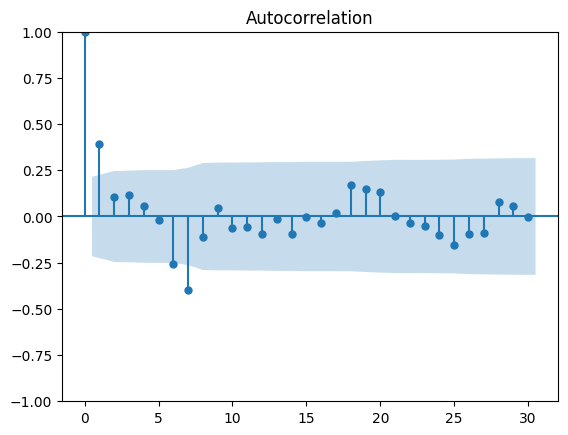

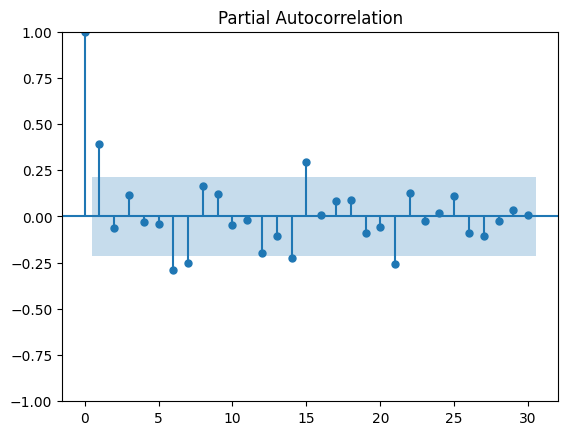

In [20]:

plot_acf(seasonal_diff, lags=30)
plot_pacf(seasonal_diff, lags=30)
plt.show()

 Train the SARIMA model

In [21]:

order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s) seasonal order
model = SARIMAX(daily_df['inv_GrandTotal'], order=order, seasonal_order=seasonal_order)
results = model.fit()

Forecast the next 20 days

In [22]:
forecasting_days = 20
forecast = results.get_forecast(steps=forecasting_days)

In [23]:
forecasted_values = forecast.predicted_mean

In [24]:
forecasted_values

2023-08-01    3791.872635
2023-08-02    3657.791085
2023-08-03    3849.809694
2023-08-04    3710.603513
2023-08-05    3836.152602
2023-08-06    3776.783775
2023-08-07    3954.400752
2023-08-08    4021.782469
2023-08-09    3861.669062
2023-08-10    4048.565355
2023-08-11    3904.182356
2023-08-12    4004.430156
2023-08-13    4002.717192
2023-08-14    4166.924606
2023-08-15    4221.879606
2023-08-16    4060.078285
2023-08-17    4246.642071
2023-08-18    4101.924032
2023-08-19    4200.536055
2023-08-20    4202.550399
Freq: D, Name: predicted_mean, dtype: float64

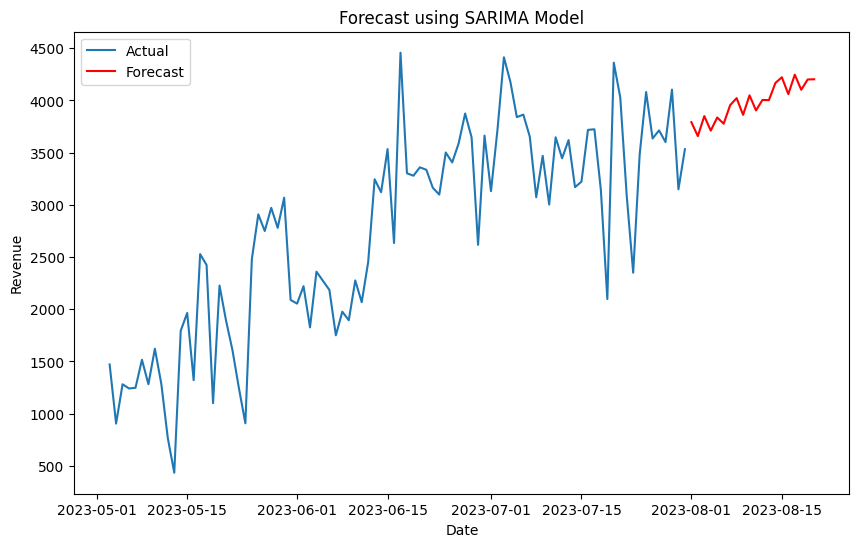

In [25]:

plt.figure(figsize=(10, 6))
plt.plot(daily_df.index, daily_df['inv_GrandTotal'], label='Actual')
plt.plot(forecasted_values.index, forecasted_values, label='Forecast', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Forecast using SARIMA Model')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get the actual values for the forecasted period
actual_values = daily_df['inv_GrandTotal'][-forecasting_days:]

# Calculate forecast errors
forecast_errors = forecasted_values - actual_values

In [28]:
mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = np.sqrt(mse)

In [29]:

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 568.38
Mean Squared Error (MSE): 579000.34
Root Mean Squared Error (RMSE): 760.92


In [60]:
last_index = daily_df.index[-1]

last_index


Timestamp('2023-07-31 00:00:00', freq='D')

In [61]:
forecasted_dates = pd.date_range(start=last_index + pd.DateOffset(days=1), periods=forecasting_days, freq='D')

In [62]:
forecasted_df = pd.DataFrame({

    'CreatedOn': forecasted_dates,
    'inv_GrandTotal': forecasted_values
})

In [63]:
forecasted_df.reset_index(drop=True)

,CreatedOn,inv_GrandTotal
0,2023-08-01,3791.872635
1,2023-08-02,3657.791085
2,2023-08-03,3849.809694
3,2023-08-04,3710.603513
4,2023-08-05,3836.152602
5,2023-08-06,3776.783775
6,2023-08-07,3954.400752
7,2023-08-08,4021.782469
8,2023-08-09,3861.669062
9,2023-08-10,4048.565355


In [79]:

rot_codes = ['COOP14', 'COOP38', 'GRF-15', 'COOP17', 'KA-02']

new_rows = []

for date in forecasted_df['CreatedOn']:
    for rot_code in rot_codes:
        new_row = {'rot_code': rot_code, 'CreatedOn': date, 'inv_GrandTotal': None}
        new_rows.append(new_row)

# Create the new DataFrame
new_df = pd.DataFrame(new_rows)


print(new_df)

   rot_code   CreatedOn inv_GrandTotal
0    COOP14  2023-08-01           None
1    COOP38  2023-08-01           None
2    GRF-15  2023-08-01           None
3    COOP17  2023-08-01           None
4     KA-02  2023-08-01           None
..      ...         ...            ...
95   COOP14  2023-08-20           None
96   COOP38  2023-08-20           None
97   GRF-15  2023-08-20           None
98   COOP17  2023-08-20           None
99    KA-02  2023-08-20           None

[100 rows x 3 columns]


In [83]:

for index, row in new_df.iterrows():
    rot_code = row['rot_code']
    date = row['CreatedOn']
    forecast_value = forecasted_values[forecasted_dates == date][0] if rot_code == 'KA-02' else ''
    new_df.at[index, 'inv_GrandTotal'] = forecast_value

print(new_df)


   rot_code   CreatedOn inv_GrandTotal
0    COOP14  2023-08-01               
1    COOP38  2023-08-01               
2    GRF-15  2023-08-01               
3    COOP17  2023-08-01               
4     KA-02  2023-08-01    3791.872635
..      ...         ...            ...
95   COOP14  2023-08-20               
96   COOP38  2023-08-20               
97   GRF-15  2023-08-20               
98   COOP17  2023-08-20               
99    KA-02  2023-08-20    4202.550399

[100 rows x 3 columns]


In [84]:
new_df

,rot_code,CreatedOn,inv_GrandTotal
0,COOP14,2023-08-01,
1,COOP38,2023-08-01,
2,GRF-15,2023-08-01,
3,COOP17,2023-08-01,
4,KA-02,2023-08-01,3791.872635
...,...,...,...
95,COOP14,2023-08-20,
96,COOP38,2023-08-20,
97,GRF-15,2023-08-20,
98,COOP17,2023-08-20,


In [85]:
output_file_path = "forecasted_data.xlsx"
new_df.to_excel(output_file_path, index=False)